# **Omkar Kadam | 20101B0066 | BE - INFT(B)**

Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

Diabetes is a chronic health condition where the body struggles to regulate blood sugar levels. It occurs when the pancreas doesn’t produce enough insulin or when the body doesn’t effectively use insulin produced. This leads to high blood sugar levels, potentially causing various health complications if not managed properly.

The dataset has been consolidated from the National Institute of Diabetes and Digestive and Kidney Diseases. It's objective is to predict whether or not an individual will have diabetes based on the parameters present.

The dataset contains several vairables.

The target variable here is "Outcome", which expressed as a binary value: 1 - the person has diabetes and 0 - the person does not have diabetes

The predictor variables in the dataset include:

a). Pregnancies: Number of times being pregnant

b). Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

c). Blood Pressure: Diastolic blood pressure (mm Hg)

d). Skin Thickness: Triceps skin fold thickness (mm)

e). Insulin: 2-Hour serum insulin (mu U/ml)

f). BMI: Body mass index (weight in kg/(height in m)^2)

g). Age: Age (years)

The problem at hand is a supervised binary classification problem. Hence, the choices for models are - Logistic Regression, Support Vector Machines, & Decision Tree. This notebook will try to achieve a comparison in between these models to suggest the best fit.

## ***Importing libraries***

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

## ***Reading and understanding the dataset***

All variables in the dataset are numeric, this eliminates the task of encoding categorical values which otherwise would have been required to be done.

There are 768 rows and 9 columns in total.

In [147]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [148]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [149]:
x,y=dataframe.shape
print("Number of Rows = ", x," \nNumber of Columns = ", y)
print("Size of the dataset = ",dataframe.size)

Number of Rows =  768  
Number of Columns =  9
Size of the dataset =  6912


In [150]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## ***Preprocessing (Cleaning the dataset) and Exploratory Data Analysis***

Checking the dataset for Null, Empty, Duplicated, Negative Values (those which are an anomaly).



In [151]:
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [152]:
dataframe.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [153]:
print("Number of Duplicated Values = ",dataframe.duplicated().sum())

Number of Duplicated Values =  0


In [154]:
check=False
for i in dataframe.columns:
  for a in dataframe[i]:
    if a<0:
      check=True
    else:
      pass
  if check:
    print(i," has negative values")
  else:
    print(i," has no negative values")

Pregnancies  has no negative values
Glucose  has no negative values
BloodPressure  has no negative values
SkinThickness  has no negative values
Insulin  has no negative values
BMI  has no negative values
DiabetesPedigreeFunction  has no negative values
Age  has no negative values
Outcome  has no negative values


Therefore, it can be confirmed that the dataset has none of the above values.

Skewness will be handled in the following steps

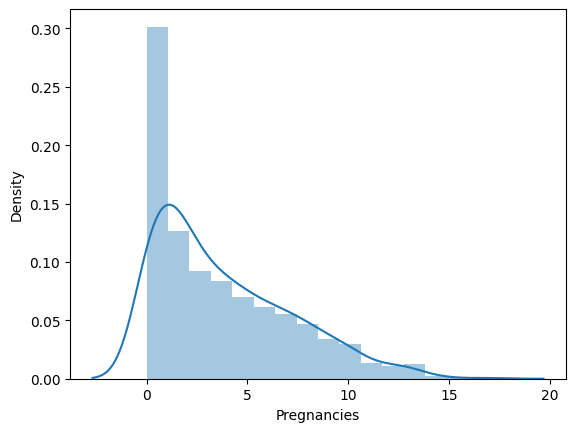

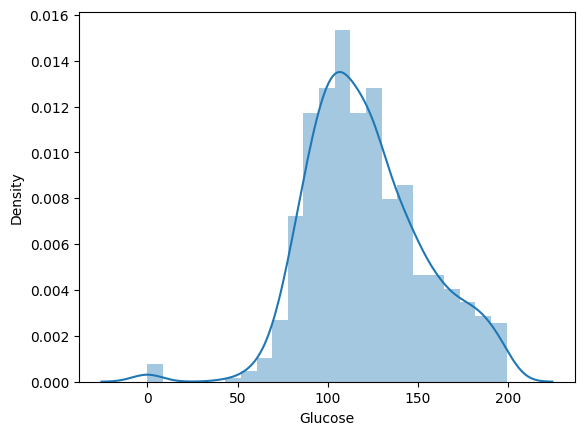

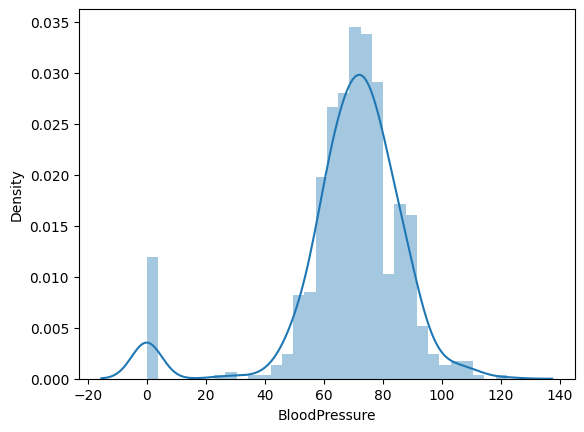

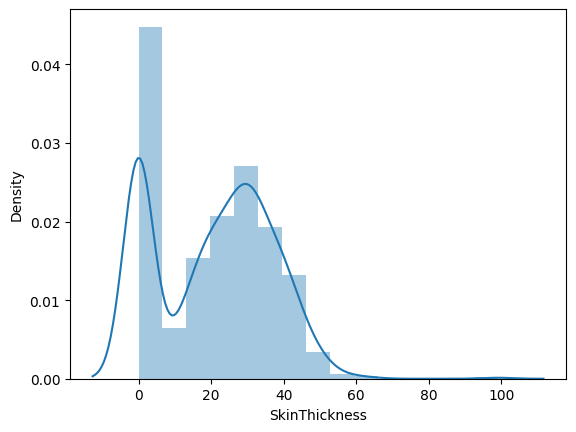

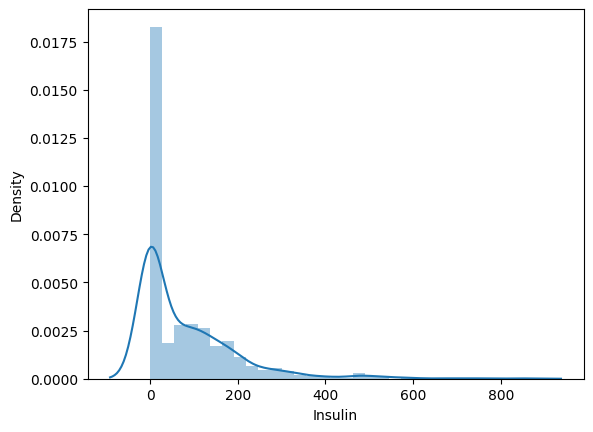

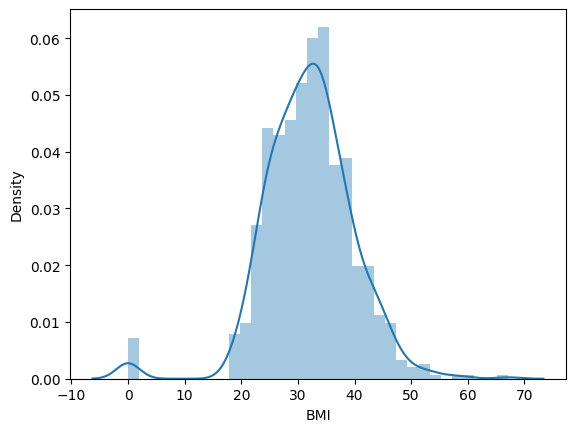

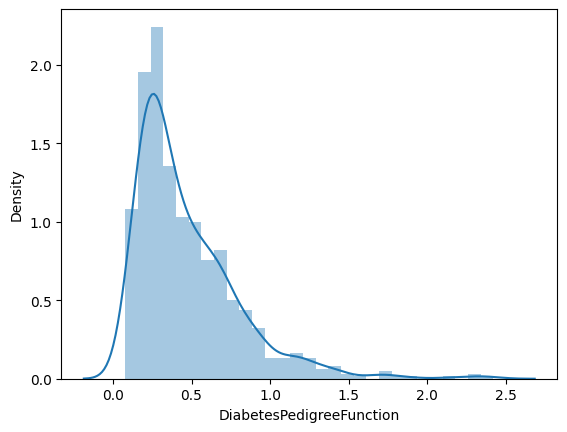

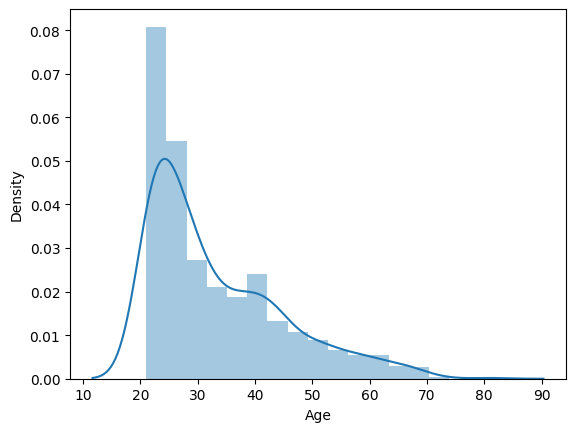

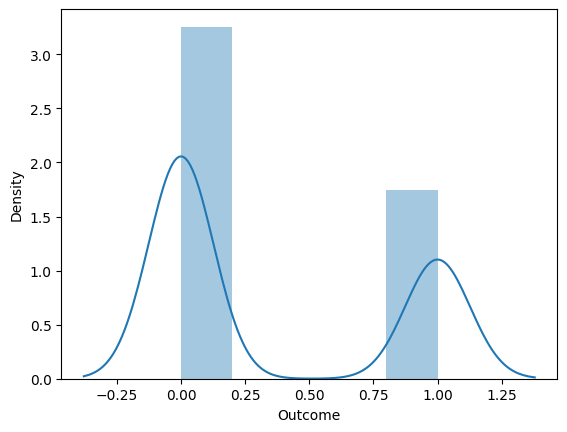

In [155]:
for i in dataframe.columns:
  sns.distplot(dataframe[i], kde=True)
  plt.show()
  print()

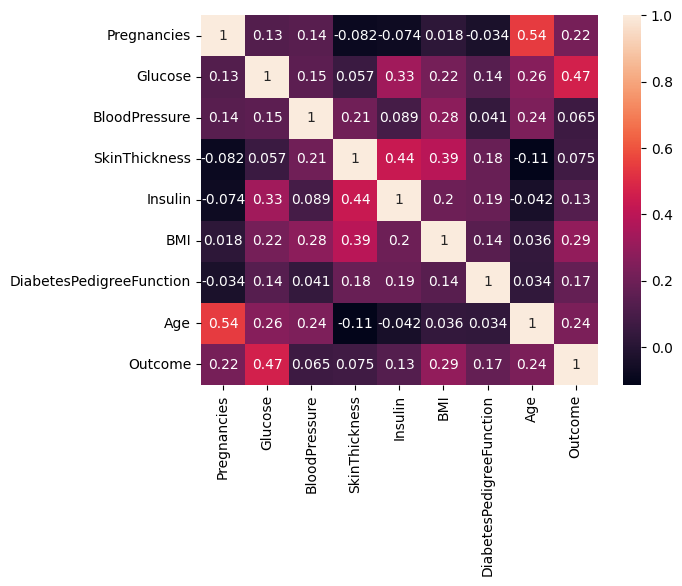

In [156]:
sns.heatmap(dataframe.corr(),annot=True)
plt.show()

In [157]:
dataframe.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [158]:
dataframe["Insulin"]=np.sqrt(dataframe["Insulin"])
dataframe["DiabetesPedigreeFunction"]=np.sqrt(dataframe["DiabetesPedigreeFunction"])
dataframe["Age"]=np.sqrt(dataframe["Age"])

In [159]:
dataframe.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     0.629955
BMI                        -0.428982
DiabetesPedigreeFunction    0.901802
Age                         0.850598
Outcome                     0.635017
dtype: float64

In [160]:
Q1=dataframe["BloodPressure"].quantile(0.25)
Q3=dataframe["BloodPressure"].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
lowerlimit = Q1 - 1.5*IQR
upperlimit = Q3 + 1.5*IQR
print(lowerlimit, upperlimit)
df = dataframe[(dataframe['BloodPressure']<lowerlimit)|(dataframe['BloodPressure']>upperlimit)]
print(df)

62.0 80.0
18.0
35.0 107.0
     Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
7             10      115              0              0   0.000000  35.3   
15             7      100              0              0   0.000000  30.0   
18             1      103             30             38   9.110434  43.3   
43             9      171            110             24  15.491933  45.4   
49             7      105              0              0   0.000000   0.0   
60             2       84              0              0   0.000000   0.0   
78             0      131              0              0   0.000000  43.2   
81             2       74              0              0   0.000000   0.0   
84             5      137            108              0   0.000000  48.8   
106            1       96            122              0   0.000000  22.4   
125            1       88             30             42   9.949874  55.0   
172            2       87              0             23   0.00

In [161]:
df.shape

(45, 9)

In [162]:
newdf = pd.concat([dataframe,df])

In [163]:
newdf.shape

(813, 9)

In [164]:
newer=newdf.drop_duplicates(keep=False)

In [165]:
newer.skew() #skewness for BloodPressure was reduced to some extent after removing outliers

Pregnancies                 0.897984
Glucose                     0.153495
BloodPressure               0.059002
SkinThickness               0.052438
Insulin                     0.558292
BMI                        -0.090206
DiabetesPedigreeFunction    0.905488
Age                         0.822838
Outcome                     0.669246
dtype: float64

<Axes: >

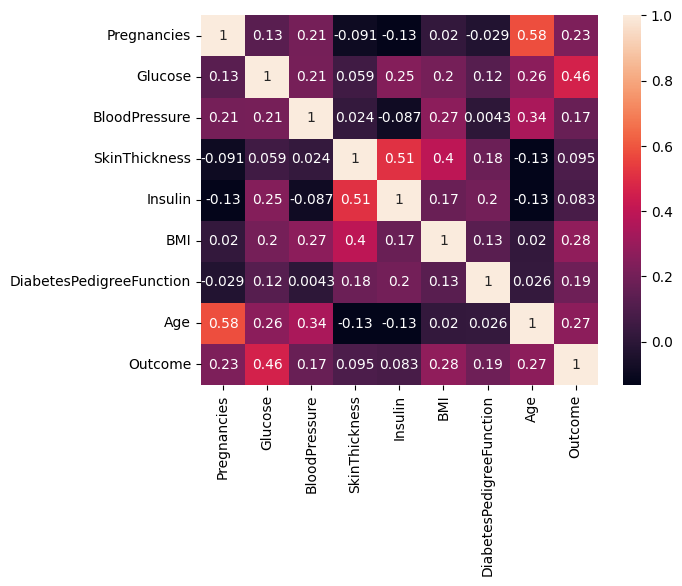

In [166]:
sns.heatmap(newer.corr(),annot=True)

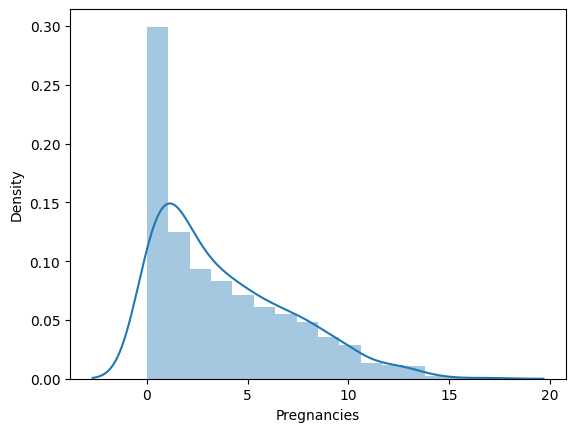

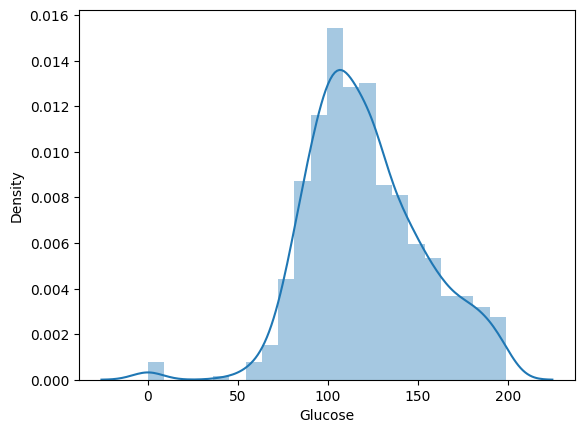

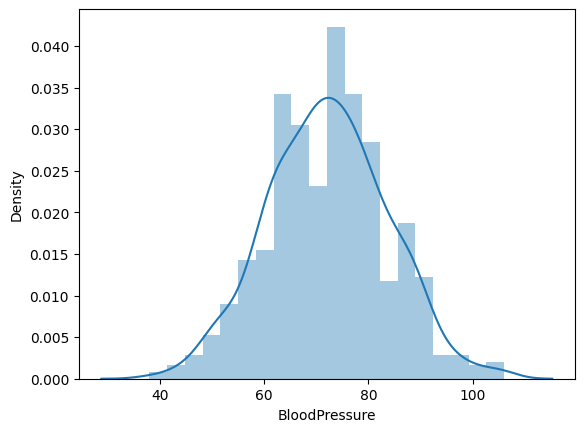

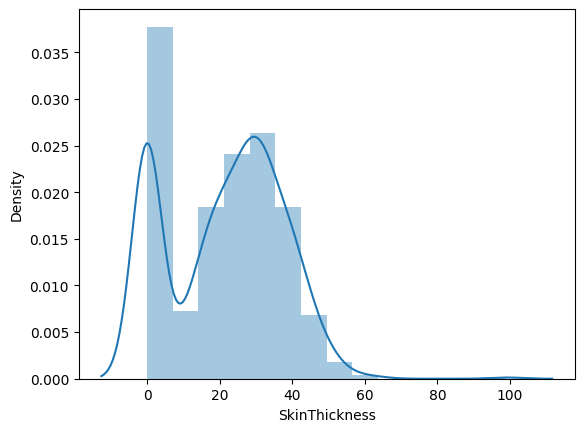

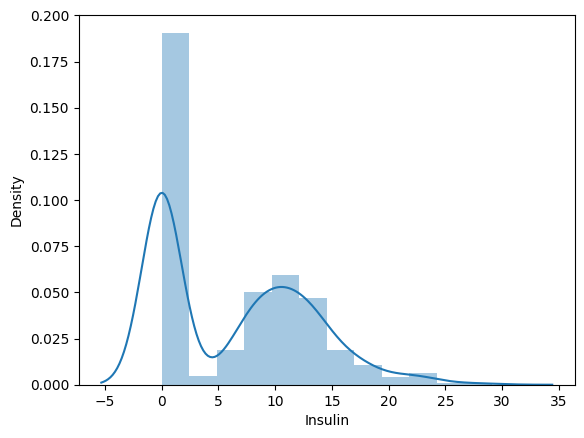

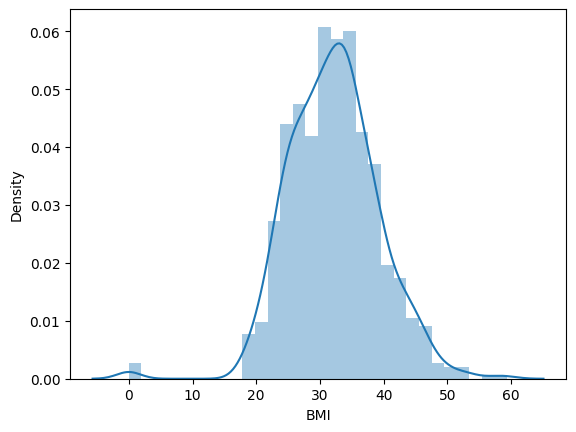

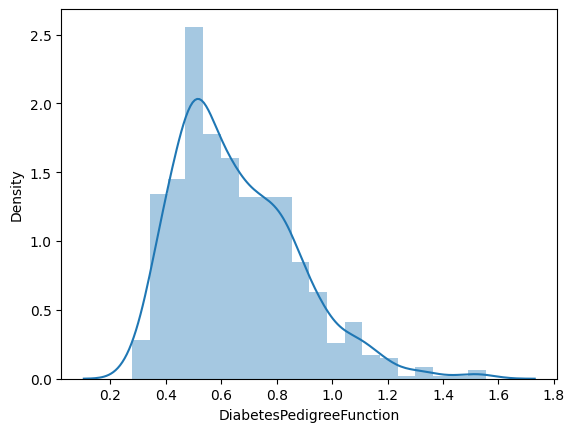

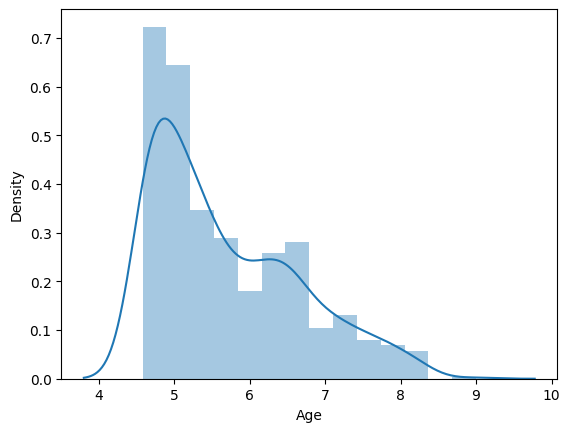

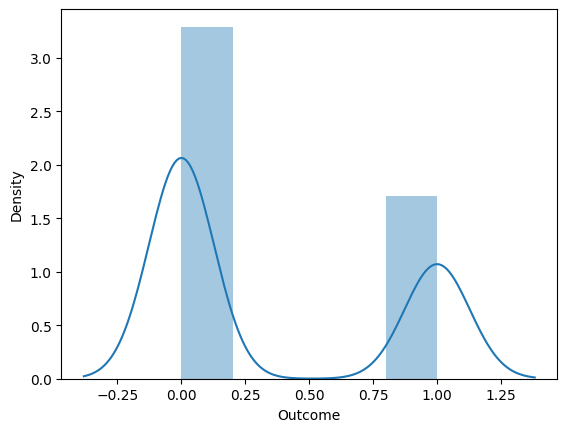

In [167]:
for i in newer.columns:
  sns.distplot(newer[i], kde=True)
  plt.show()
  print()

Skewness has been handled to some extent.

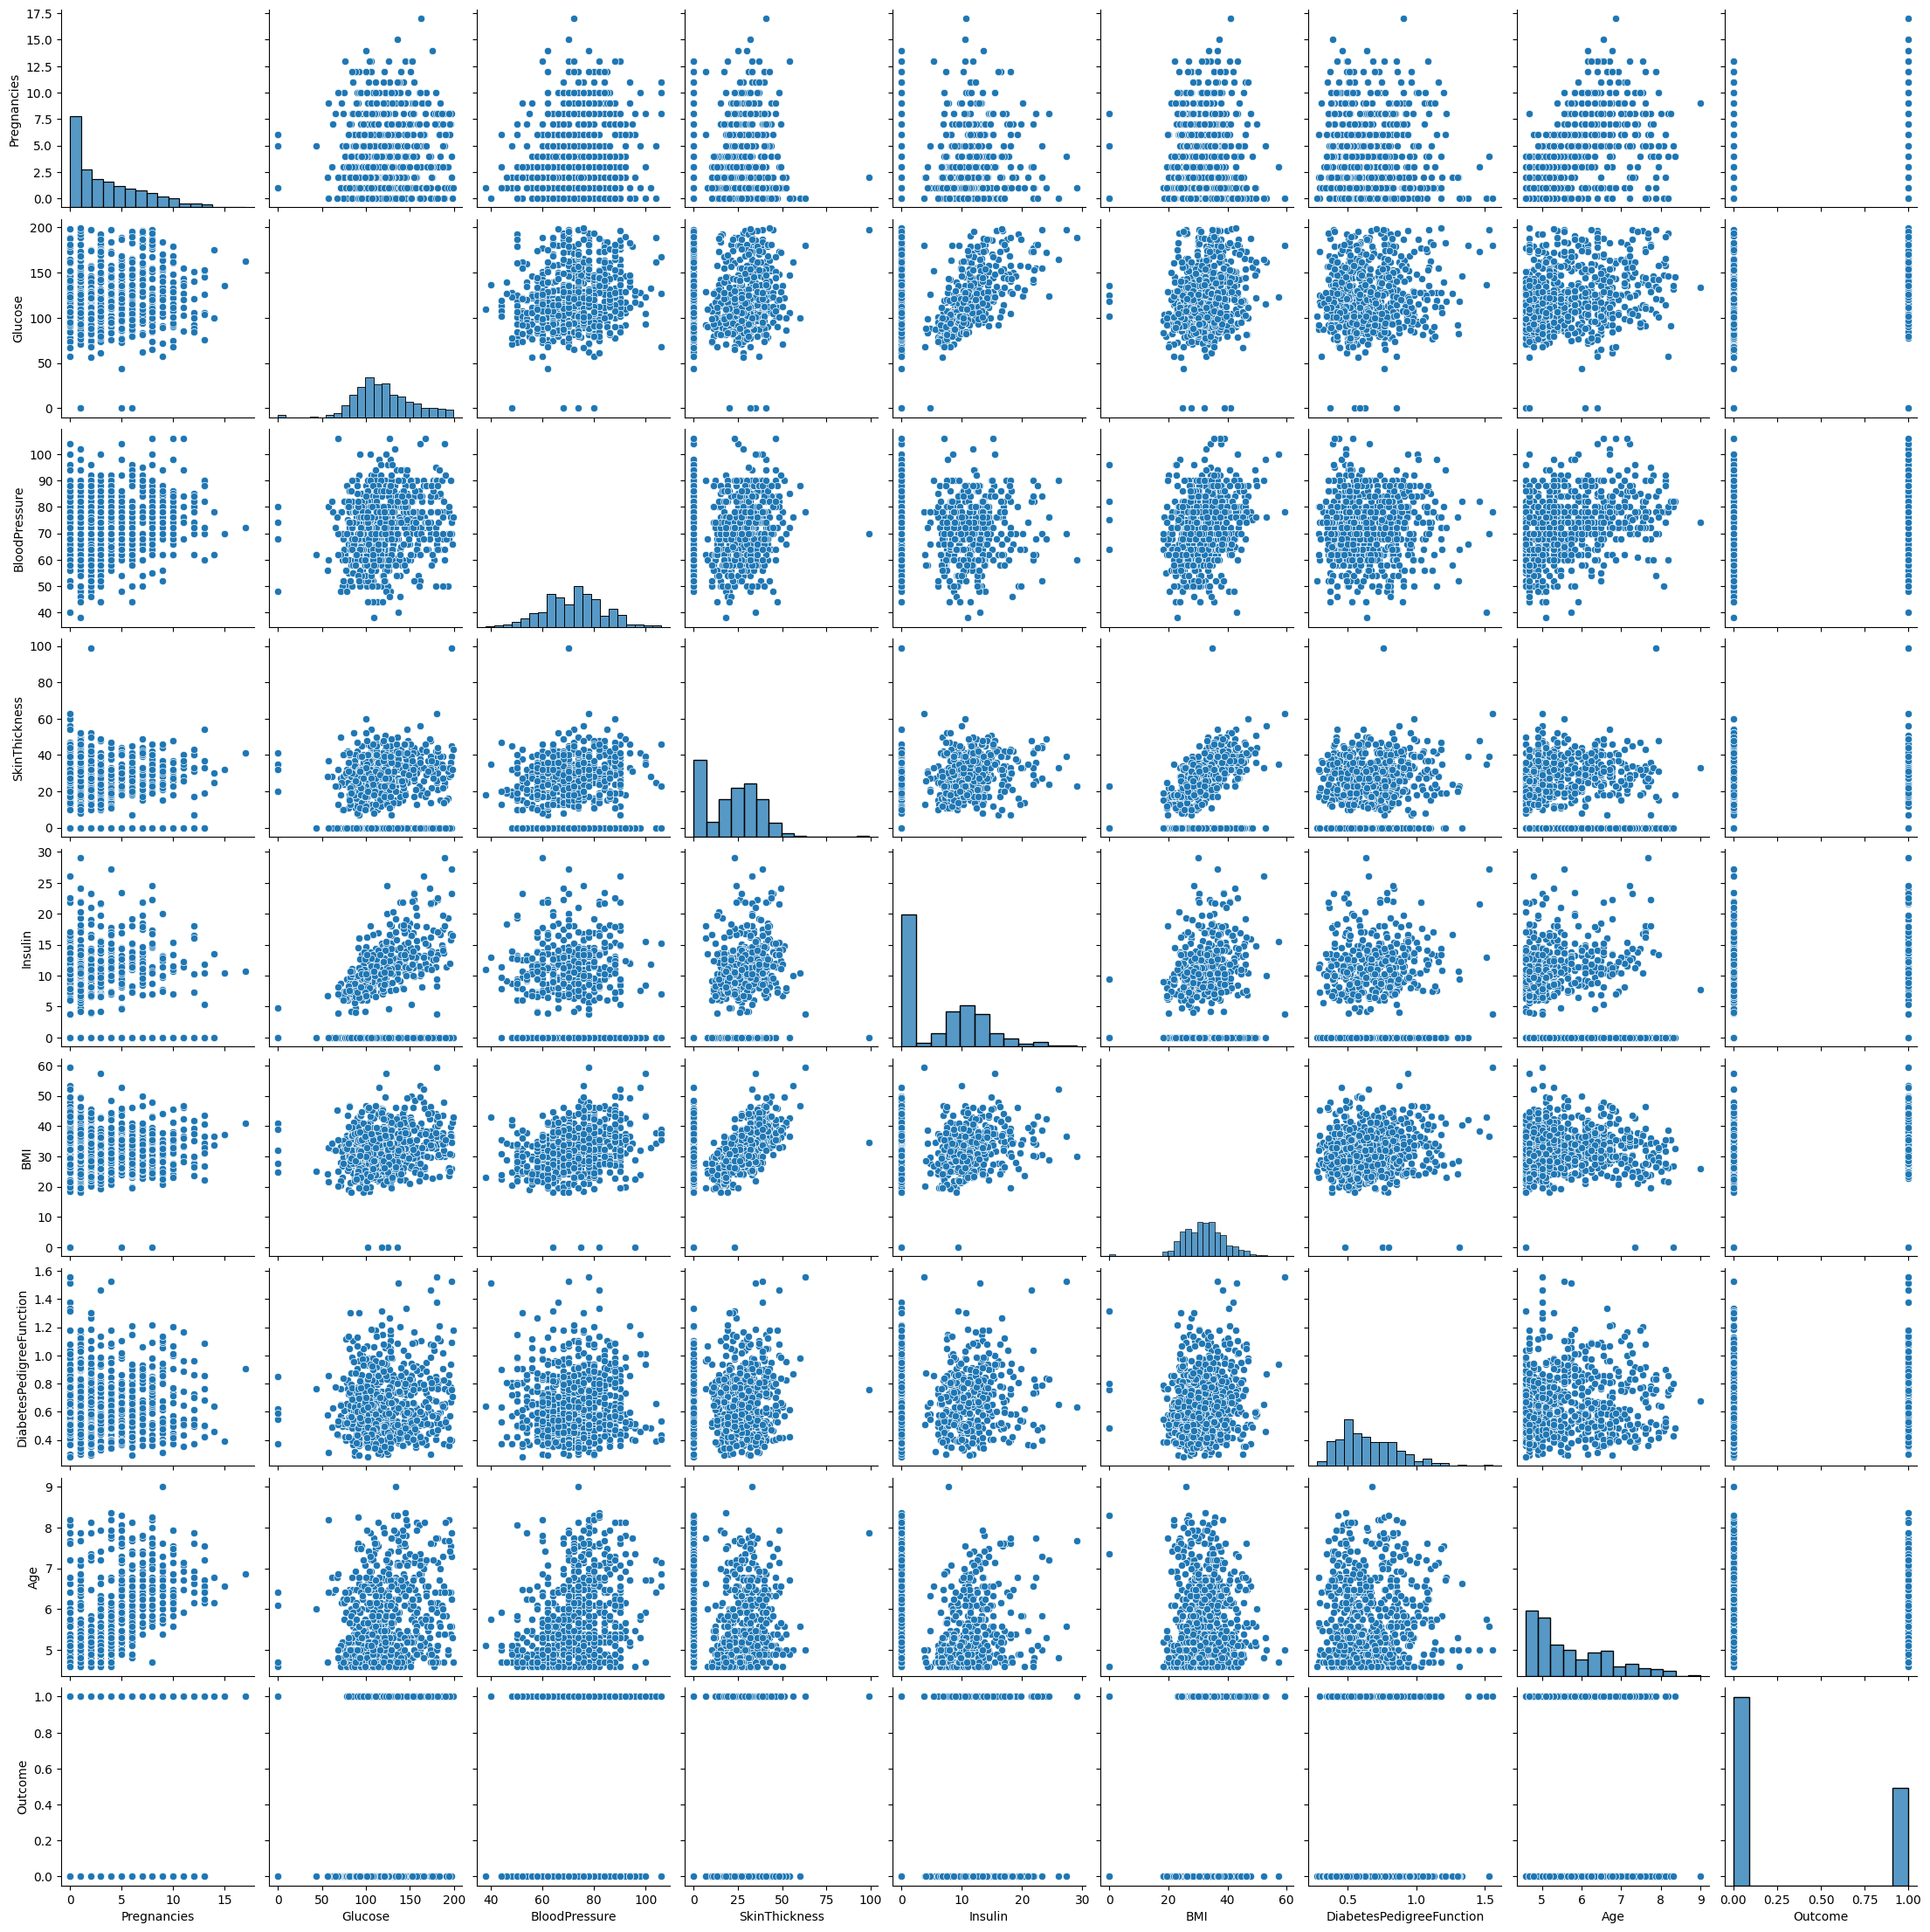

In [169]:
sns.pairplot(newer)
plt.show()

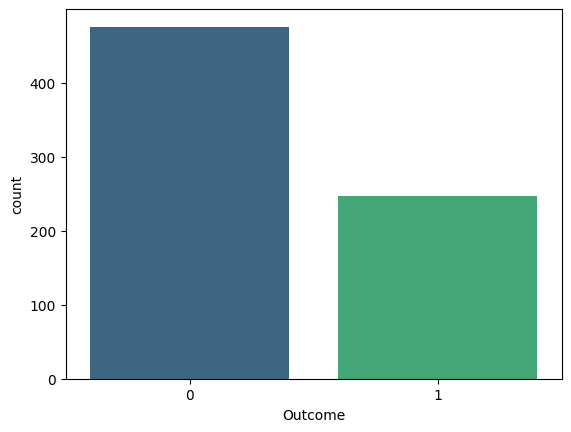

In [172]:
sns.countplot(x=newer["Outcome"], palette="viridis")
plt.show()

Data is ready for modelling.

## ***Modelling***

Splitting the dataset into 80-20 for training and testing respectively.

In [235]:
X=newer.drop(['Outcome'],axis=1)
y=newer['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(578, 8)
(145, 8)
(578,)
(145,)
Accuracy of the logistic regression model is = 77.93103448275862


In [236]:
logrmodel = LogisticRegression(random_state = 100)
logrmodel.fit(X_train,y_train)

LogisticRegression(random_state=100)

In [237]:
predictions_test=logrmodel.predict(X_test)

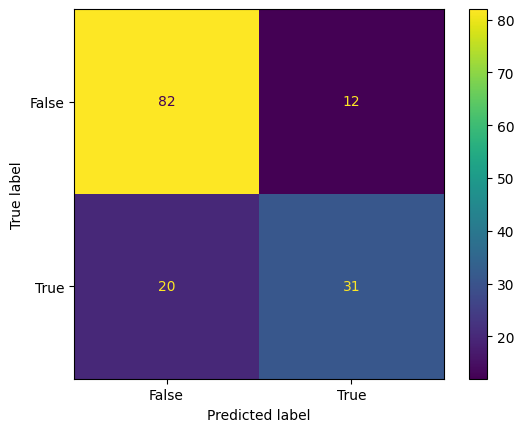

In [238]:
cfm = confusion_matrix(y_test, predictions_test)
cfm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels=[False, True])
cfm_display.plot()
plt.show()

In [241]:
accuracy1 = accuracy_score(y_test, predictions_test)
print("Accuracy of the logistic regression model is =", accuracy1*100)

Accuracy of the logistic regression model is = 77.93103448275862


In [253]:
svmmodel = svm.SVC(kernel='linear', random_state=0)
svmmodel.fit(X_train, y_train)
predictions_test1 = svmmodel.predict(X_test)

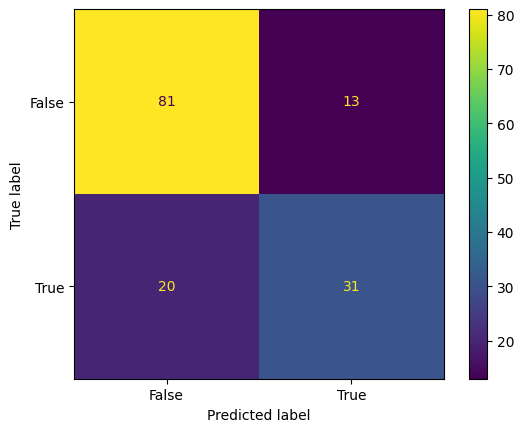

In [254]:
cfm = confusion_matrix(y_test, predictions_test1)
cfm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels=[False, True])
cfm_display.plot()
plt.show()

In [255]:
accuracy2 = accuracy_score(y_test, predictions_test1)
print("Accuracy of the SVM model is =", accuracy2*100)

Accuracy of the SVM model is = 77.24137931034483


In [270]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=10, max_depth=4)
decision_tree.fit(X_train, y_train)
predictions_test2 = decision_tree.predict(X_test)

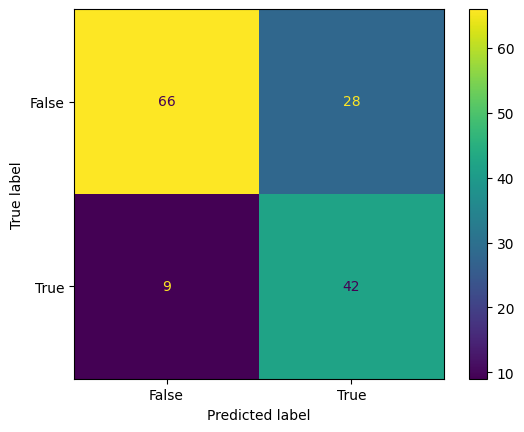

In [271]:
cfm = confusion_matrix(y_test, predictions_test2)
cfm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels=[False, True])
cfm_display.plot()
plt.show()

In [273]:
accuracy3 = accuracy_score(y_test, predictions_test2)
print("Accuracy of the Decision Tree model is =", accuracy3*100)

Accuracy of the Decision Tree model is = 74.48275862068967


In [294]:
report = classification_report(y_test, predictions_test)
print("Report Logistic Regression Model: \n", report)
report2 = classification_report(y_test, predictions_test1)
print("Report Support Vector Machine Model: \n", report2)
report3 = classification_report(y_test, predictions_test2)
print("Report Decision Tree Model: \n", report3)

Report Logistic Regression Model: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.84        94
           1       0.72      0.61      0.66        51

    accuracy                           0.78       145
   macro avg       0.76      0.74      0.75       145
weighted avg       0.77      0.78      0.77       145

Report Support Vector Machine Model: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        94
           1       0.70      0.61      0.65        51

    accuracy                           0.77       145
   macro avg       0.75      0.73      0.74       145
weighted avg       0.77      0.77      0.77       145

Report Decision Tree Model: 
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        94
           1       0.60      0.82      0.69        51

    accuracy                           0.74       145
   macro avg       0.74

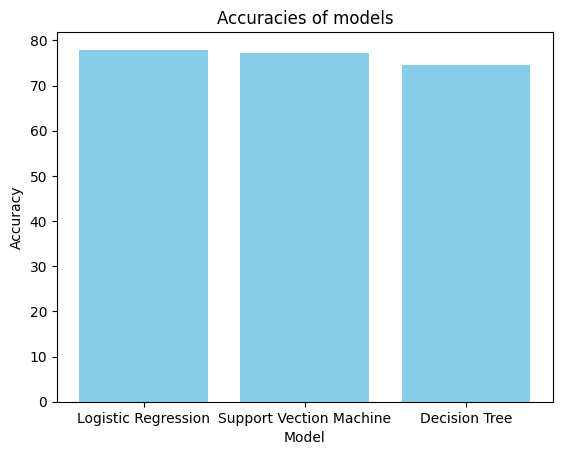

In [300]:
values = [accuracy1*100, accuracy2*100, accuracy3*100]
labels = ['Logistic Regression', 'Support Vection Machine', 'Decision Tree']
plt.bar(labels, values, color='skyblue')

plt.title('Accuracies of models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()